<a href="https://colab.research.google.com/github/nihalhabeeb/rental_bike_demand_prediction/blob/main/Soul_Bike_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Set Information:**

The dataset contains the number of bikes rented per hour in the city of Seoul, date information as well as the weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall).

Data source: http://data.seoul.go.kr/


**Attribute Information:**

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of the day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset with latin1 encoding
df = pd.read_csv('/content/drive/MyDrive/Self Projects/Soul Bike Data/SeoulBikeData.csv', encoding = 'latin1')

## Data Cleaning

In [3]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There are no missing values in the dataset.

In [4]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
# renaming columns for simplicity
df.rename(columns = {'Date':'date','Rented Bike Count':'rented_bike_count','Hour':'hour',
                     'Temperature(°C)':'temperature','Humidity(%)':'humidity',
                     'Wind speed (m/s)':'wind_speed','Visibility (10m)':'visibility',
                     'Dew point temperature(°C)':'dew_point_temp','Solar Radiation (MJ/m2)':'solar_radiation',
                     'Rainfall(mm)':'rainfall','Snowfall (cm)':'snowfall','Seasons':'season','Holiday':'holiday',
                     'Functioning Day':'functioning_day'}, inplace = True)

In [6]:
df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,season,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# converting date to datetime format
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))

# creating a new column for year
df['year'] = df['date'].apply(lambda x: x.year)

# creating a month column were month is represented by numbers
df['month'] = df['date'].apply(lambda x: x.month)

## Exploratory Data Analysis

Number of rented bikes in each year.

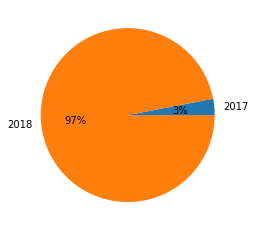

In [8]:
# percentage of rented bikes in each year
plt.pie(df.groupby('year')['rented_bike_count'].sum(),labels=['2017','2018'],autopct='%.0f%%')
plt.show()

The total rented bike count is way higher in 2018. This is because most of the data is from that year.

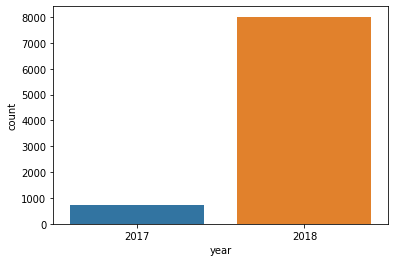

In [9]:
# count of data from each year
sns.countplot(data = df, x = 'year')

Rented bikes in each month.

Text(0.5, 1.0, 'Number of Rented Bikes vs Month')

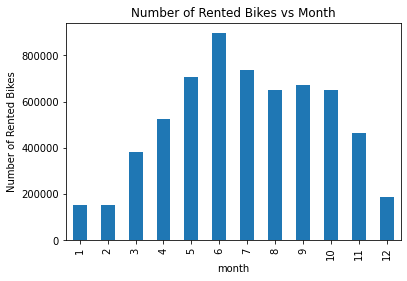

In [10]:
# total rented bikes in each month
df.groupby('month')['rented_bike_count'].sum().plot(kind='bar')
plt.ylabel('Number of Rented Bikes')
plt.title('Number of Rented Bikes vs Month')

June followed by July and May (summer season) has the most bikes rented. January, February and December (winter) has the least number of bikes rented.

The number of rented bikes in each hour (summed over the whole dataset by hour).

Text(0.5, 1.0, 'Number of Rented Bikes vs Hour of the Day')

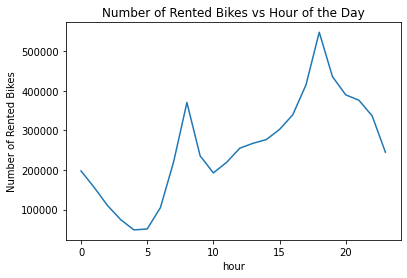

In [11]:
# total rented bikes in each hour
df.groupby('hour')['rented_bike_count'].sum().plot(kind = 'line')
plt.ylabel('Number of Rented Bikes')
plt.title('Number of Rented Bikes vs Hour of the Day')

The peak time of the day in terms of bikes rented is around 4-7 pm in the evening. There is a smaller peak in the morning (around 7-9 am). The least activity is during the early morning period.

Number of rented bikes each season.

Text(0.5, 1.0, 'Number of Rented Bikes vs Season')

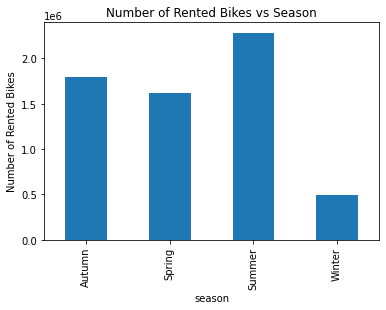

In [12]:
# total rented bikes in each seasons
df.groupby('season')['rented_bike_count'].sum().plot(kind = 'bar')
plt.ylabel('Number of Rented Bikes')
plt.title('Number of Rented Bikes vs Season')

Summer has highest activity and winter has the least activity.

Number of rented bikes by holiday.

Text(0.5, 1.0, 'Number of Rented Bikes vs Holiday')

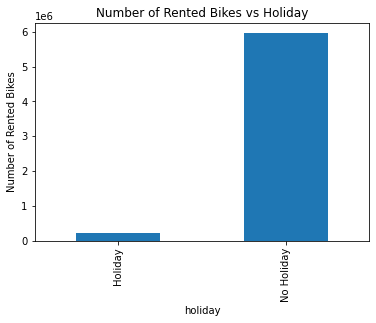

In [13]:
# total rented bikes by holiday
df.groupby('holiday')['rented_bike_count'].sum().plot(kind = 'bar')
plt.ylabel('Number of Rented Bikes')
plt.title('Number of Rented Bikes vs Holiday')

The number of rented bikes is very low on holidays

Looking at the non functioning days.

In [14]:
# data from the days when the service is not functioning
df[df['functioning_day'] == 'No']

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,season,holiday,functioning_day,year,month
3144,2018-04-11,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No,2018,4
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,2018-11-09,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11
8252,2018-11-09,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11
8253,2018-11-09,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11
8254,2018-11-09,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,2018,11


It is expected that the rented bike count will be zero on the days when the service is not functioning (the same count of data below shows that).

In [15]:
# data count where the day is not functioning
df.loc[df['functioning_day'] == 'No'].shape

(295, 16)

In [16]:
# data count where the day is not functioning and the count of rented bikes is zero
df.loc[(df['functioning_day'] == 'No') & (df['rented_bike_count'] == 0)].shape

(295, 16)

The data of non functioning days can be removed as the rental bike count is going to be zero those days. It does not help in predicting bike demands based on features (apart from the obvious fact that the bikes rented will be zero when the service is non functional). In addition, the model predictions can help decide if it is okay to stop the service on certain days (based on the demands). 

In [17]:
# only including data where the day is functioning
df.drop(df[df['functioning_day'] == 'No'].index, inplace = True)

In [18]:
# dropping the functioning_day column as it is now redundant
df.drop(columns = ['functioning_day'], axis = 1, inplace = True)

In [19]:
# making a copy of the dataset
data = df.copy()

### Linear relationship

In [20]:
# list of numerical features
numerical_features = list(data.describe().columns)
numerical_features.remove('rented_bike_count')
numerical_features

['hour',
 'temperature',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'year',
 'month']

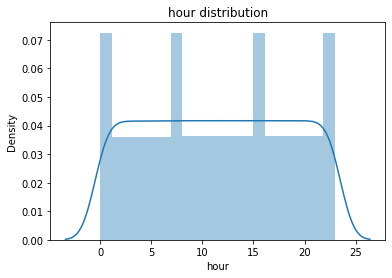

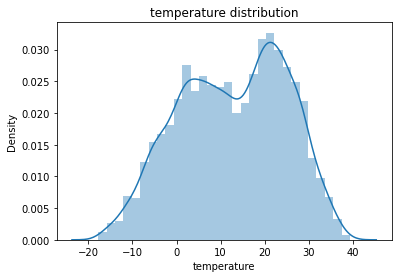

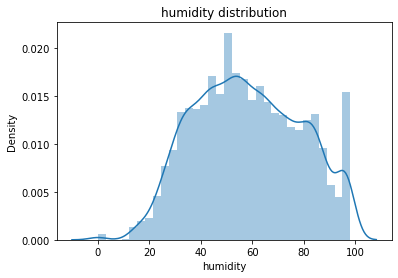

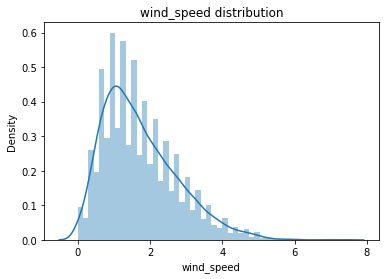

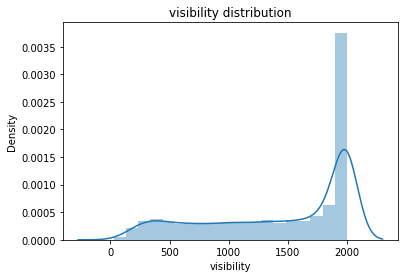

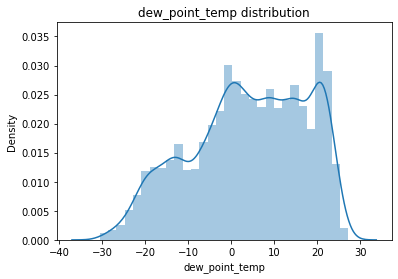

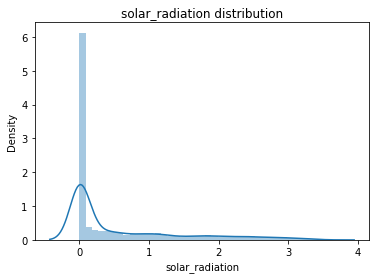

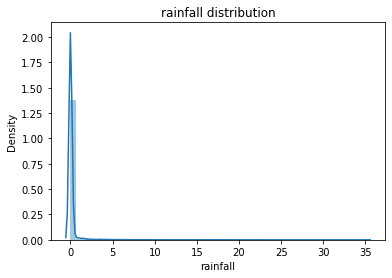

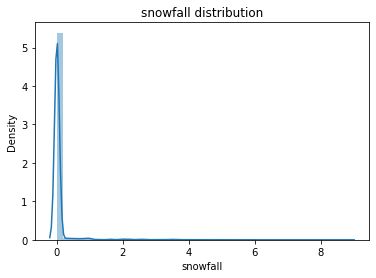

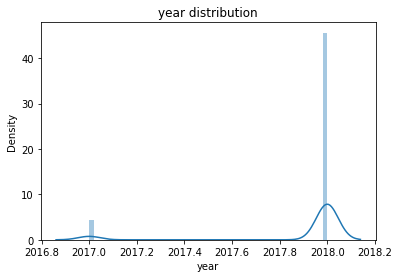

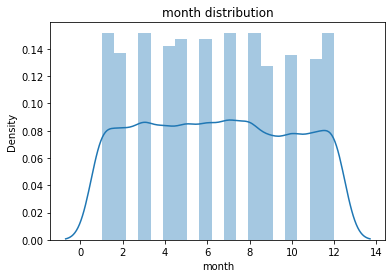

In [21]:
# distribution of each features
for column in numerical_features:
  sns.distplot(data[column])
  plt.title(column + ' distribution')
  plt.show()

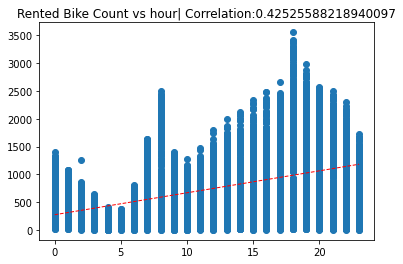

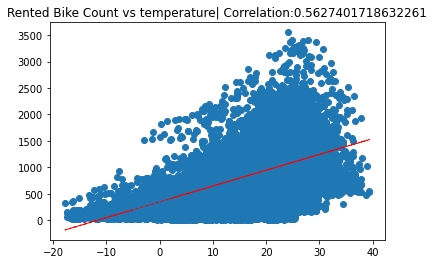

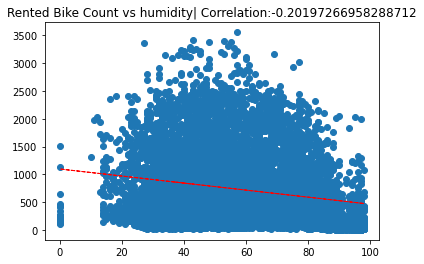

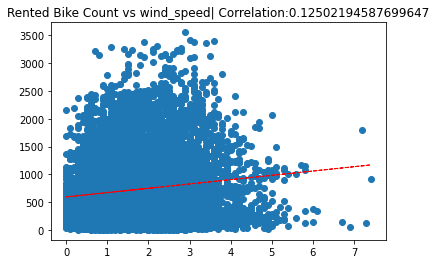

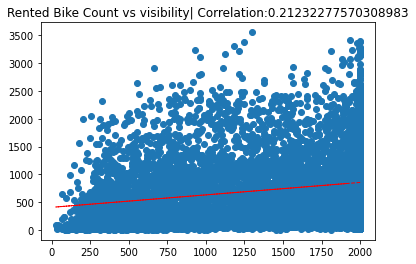

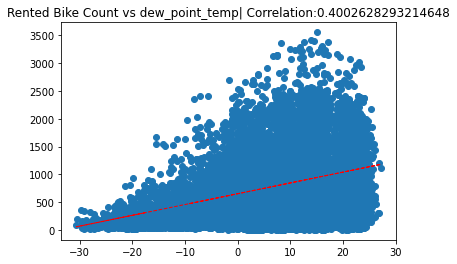

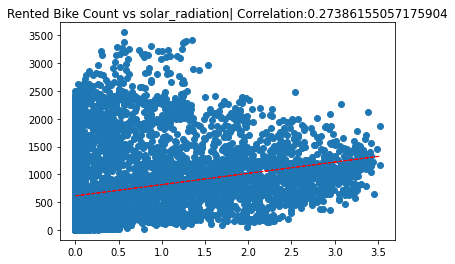

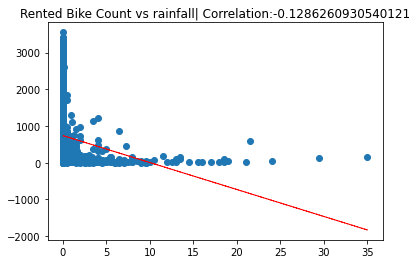

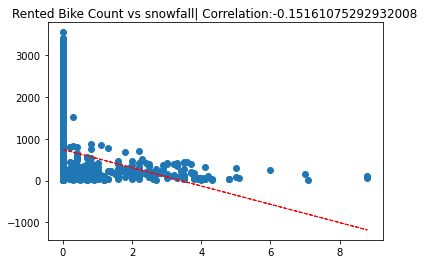

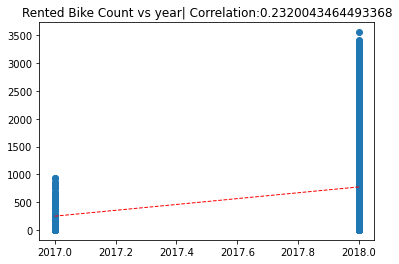

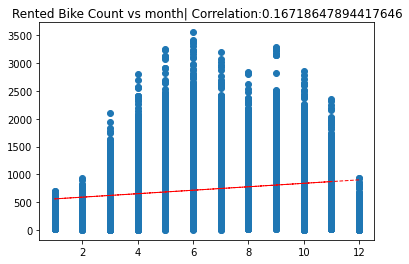

In [22]:
for column in numerical_features:
  plt.scatter(data[column], data['rented_bike_count'])
  correlation = data[column].corr(data['rented_bike_count'])
  plt.title('Rented Bike Count vs ' + column + "| Correlation:" + str(correlation))
  slope, intercept = np.polyfit(data[column], data['rented_bike_count'], 1)
  plt.plot(data[column], slope*data[column] + intercept, "r--", lw = 1)
  plt.show()

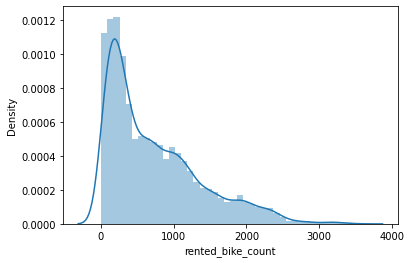

In [23]:
# distribution of the target variable
sns.distplot(data['rented_bike_count'])

The distribution is skewed and we can try taking a log transformation.

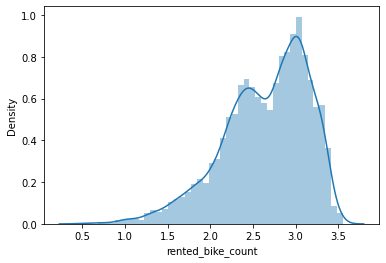

In [24]:
# distribution of log transformation of target variable
sns.distplot(np.log10(data['rented_bike_count']+1))

The log transformation is skewed as well.

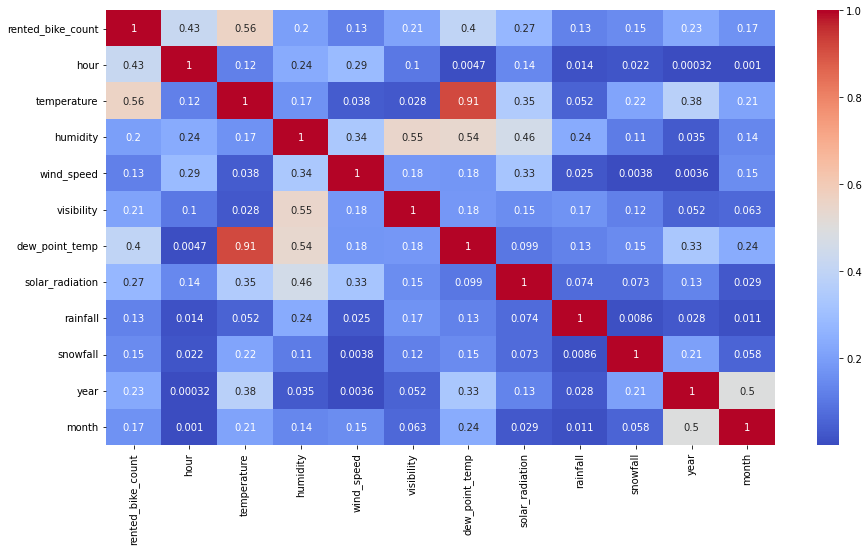

In [25]:
# correlation heatmap
plt.figure(figsize=(15,8))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Temperature and dew point temperature are highly correlated. We will be removing dew point temperature.

In [26]:
selected_num_features = ['hour','temperature','humidity','wind_speed','visibility','solar_radiation','rainfall','snowfall', 'month']

### non numerical features

In [27]:
data.describe(include = ['category','object'])

,season,holiday
count,8465,8465
unique,4,2
top,Summer,No Holiday
freq,2208,8057


In [28]:
categorical_features = list(data.describe(include = ['object','category']).columns)
categorical_features

['season', 'holiday']

## Fitting the model

### Linear Regression

The object data type can be converted to integers.

In [29]:
# label encoding
label_encoders = {"holiday":{"No Holiday":0,"Holiday":1}}
data = data.replace(label_encoders)

We can create dummy variables for each category of season column (but we will only include three of those as the information of the fourth one is included in the rest, hence the drop_first = True argument).

In [30]:
# one hot encoding
data = pd.get_dummies(data, columns=["season"], prefix=["season"], drop_first=True)

In [31]:
data.tail()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,holiday,year,month,season_Spring,season_Summer,season_Winter
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,2018,11,0,0,0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,2018,11,0,0,0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,2018,11,0,0,0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,2018,11,0,0,0
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,0,2018,11,0,0,0


In [32]:
# removing snowfall and rainfall (as they dont have linear relationship with the target variable)
selected_num_features.remove('snowfall')
selected_num_features.remove('rainfall')
selected_num_features

['hour',
 'temperature',
 'humidity',
 'wind_speed',
 'visibility',
 'solar_radiation',
 'month']

In [33]:
selected_num_features.extend(['holiday','season_Spring','season_Summer','season_Winter'])

In [34]:
# defining data of independent variables and dependent variables
X = data[selected_num_features]
y = data['rented_bike_count']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [69]:
# splitting into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [37]:
# scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# r2 score for training set
model.score(X_train,y_train)

0.534370487444807

In [40]:
# r2 score for testing set
model.score(X_test,y_test)

0.5117558744340127

In [41]:
model.intercept_

241.76677172743376

In [42]:
model.coef_

array([ 640.84533526, 1548.5725967 , -904.45551662,  123.52385395,
         28.53701739, -300.85179337,   56.06544079, -129.46097105,
       -108.60079068, -143.30198688, -330.23604208])

In [43]:
# predicting using the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [44]:
# performance metrics for testing set
# root mean squared error
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
print('R2 score:', r2_score(y_test, y_pred))

RMSE: 454.3735647954152
R2 score: 0.5117558744340127


In [45]:
# performance metrics for training set
# root mean squared error
print('RMSE:', math.sqrt(mean_squared_error(y_train, y_train_pred)))
# r2 score
print('R2 score:', r2_score(y_train, y_train_pred))

RMSE: 436.9096921808084
R2 score: 0.534370487444807


### Decision Tree Regressor

In [46]:
# making a new copy of the dataset
data2 = df.copy()

In [47]:
# dropping date and year columns
data2.drop(['date','year'], axis = 1, inplace = True)

Scikit-learn DecisionTreeRegressor accepts only numerical values. The categorical values have to be converted to numerical form.

In [48]:
# label encoding
label_encoders = {"holiday":{"No Holiday":0,"Holiday":1}, "season":{"Winter":0,"Spring":1,"Summer":2,"Autumn":3}}
data2 = data2.replace(label_encoders)

### Decision tree regression

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [50]:
independent_variables = ['hour','temperature','humidity','wind_speed','visibility','dew_point_temp','solar_radiation','rainfall','snowfall','season','holiday','month']

In [51]:
# dataset of independent variables
X = data2[independent_variables]
# dataset of dependent variables
y = data2['rented_bike_count']

In [52]:
print(X.shape)
print(y.shape)

(8465, 12)
(8465,)


In [71]:
# splitting the data to training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [54]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5671, 12)
(5671,)
(2794, 12)
(2794,)


In [158]:
# GridSearchCV for hyperparameter tuning

decision_tree_reg = DecisionTreeRegressor()
grid_parameters = {"max_depth": [3, 5, 7], "max_leaf_nodes": [None, 50, 60, 70, 80, 90], "min_samples_leaf":[7,8,9,10]}
# grid_parameters = {"max_depth": [5, 7, 9, 11]}

regressor_model = GridSearchCV(decision_tree_reg, param_grid = grid_parameters, scoring = 'neg_mean_squared_error', cv = 5)

In [159]:
# fitting the model
regressor_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_leaf_nodes': [None, 50, 60, 70, 80, 90],
                         'min_samples_leaf': [7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [160]:
# best hyper parameters
regressor_model.best_params_

{'max_depth': 7, 'max_leaf_nodes': None, 'min_samples_leaf': 8}

In [161]:
# best score (negative mean squared error)
regressor_model.best_score_

-85211.76158135843

In [162]:
# prediction
y_train_pred2 = regressor_model.predict(X_train)
y_test_pred2 = regressor_model.predict(X_test)

In [163]:
# performance metrics for testing set
# r2_score
print("r2 score:",r2_score(y_test,y_test_pred2))
# rmse
print("RMSE:", math.sqrt(mean_squared_error(y_test,y_test_pred2)))

r2 score: 0.7799205319088963
RMSE: 304.4247174906314


In [164]:
# performance metrics for training set
# r2_score
print("r2 score:",r2_score(y_train,y_train_pred2))
# rmse
print("RMSE:", math.sqrt(mean_squared_error(y_train,y_train_pred2)))

r2 score: 0.8328601459379475
RMSE: 261.2260801680112


### Random Forest Regression

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [152]:
# Hyperparameter tuning

rf_regressor = RandomForestRegressor()
grid_values = {'n_estimators':[50, 80, 100], 'max_depth':[3, 5, 7]}
# grid_values = {'n_estimators':[50, 80, 100], 'max_depth':[3, 5, 7, 9, 11]}
rf_regressor = GridSearchCV(rf_regressor, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=5)

# Fit the model to training dataset
rf_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error')

In [153]:
rf_regressor.best_params_

{'max_depth': 7, 'n_estimators': 80}

In [154]:
rf_regressor.best_score_

-65583.60580030495

In [155]:
# prediction
y_train_pred3 = rf_regressor.predict(X_train)
y_test_pred3 = rf_regressor.predict(X_test)

In [156]:
# performance metrics for testing set
# r2_score
print("r2 score:",r2_score(y_test,y_test_pred3))
# rmse
print("RMSE:", math.sqrt(mean_squared_error(y_test,y_test_pred3)))

r2 score: 0.8350517935821122
RMSE: 263.5505619636055


In [157]:
# performance metrics for training set
# r2_score
print("r2 score:",r2_score(y_train,y_train_pred3))
# rmse
print("RMSE:", math.sqrt(mean_squared_error(y_train,y_train_pred3)))

r2 score: 0.8723839087444105
RMSE: 228.25970076801704
